# Design an App that predicts movie genres and detects spoilers in reviews

Now that I have the CSV files of my scraped data, it time to put everything together and to perform some EDA 

### Part3: IMDB EDA

Author: Sana Krichen    
https://www.linkedin.com/in/sanakrichen/    
https://github.com/skrichen

In [3]:
# import standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

I want to put all the collected data together within one single dataframe

In [4]:
# get a list of dataframes that I want to put together
list_df=[]
for dec in ['fifties', 'sixties', 'seventies', 'eighties', 'nineties', 'twothousands', 'twothousandstens','twothousandstwenties']:
    list_df.append(pd.read_csv(f'/Users/SanaKrichen/Desktop/BrainStation/Capstone Project/{dec}/scraped_df_{dec}.csv'))

In [5]:
# concatenate all the dataframes
df=pd.concat(list_df, ignore_index=True )
df.drop_duplicates(keep="first", inplace=False).reset_index(inplace = True) 
df

,tconst,genre,plot
0,tt0030998,['Comedy'],(The IMDb storyline is incorrect.) On the even...
1,tt0042184,"['Comedy', 'Romance']","Synopsis Has been Written by Mr Rais Asghar, M..."
2,tt0042192,"['Drama', 'contentRating', 'Passed']","At a prestigious awards ceremony, the celebrit..."
3,tt0042208,"['Crime', 'Drama', 'FilmNoir', 'Thriller']",A group of career criminals including Dix Hand...
4,tt0042249,"['Drama', 'War']",THE BIG LIFTThe Soviet Union withdraws from wh...
...,...,...,...
13341,tt9203586,['Documentary'],Bitcoin has been called one of the most disrup...
13342,tt9214832,"['Comedy', 'Drama']",Miss Taylor's wedding to Mr Weston is a sad da...
13343,tt9452824,['Horror'],"Cult Cinema presents ""Faces of the Dead"" this ..."
13344,tt9580138,"['Animation', 'Action', 'Adventure', 'Fantasy']","In Japan, Shirai Ryu Grandmaster Hanzo Hasashi..."


In [6]:
# get the counts of the movies for every decade
dec=['fifties', 'sixties', 'seventies', 'eighties', 'nineties', 'twothousands', 'twothousandstens','twothousandstwenties']
movies_per_dec=[list_df[i].shape[0] for i in range(len(list_df))]
movies_per_dec

[457, 616, 754, 2111, 1110, 3497, 4748, 53]

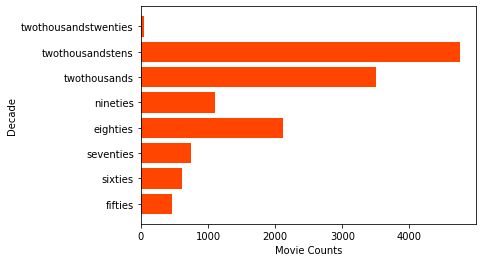

In [7]:
#Plot the number of movies collected per decade
plt.figure()
plt.barh(dec, movies_per_dec, color='orangered')
plt.ylabel('Decade')
plt.xlabel('Movie Counts')
plt.show()

The movies collected are spread over the last 70 years. We can see that most of the movies in my dataset were released between the years 2000 and 2019. I noticed that, in general, as you move towards the past, the number of the movies per decade gets smaller and smaller... This does not mean necessarily that the number of movies produced during previous decades are less than the number of movies produced these recent years. It just means that the movies with a written synopsis in the IMDB website are more frequent when they are recently released.  

It is now time to perform some cleaning. Let's check if the dataset has any null values

In [9]:
# Checking for null values
df.isna().sum()

tconst    0
genre     0
plot      0
dtype: int64

In [10]:
# I know that I don't have any null values in df['plot'] 
#because of the way I designed my web scraped but it is always safe to check
df[df['plot']=='']

,tconst,genre,plot


In [11]:
# Check the indicies of the movies without genres 
list(df[df['genre']=='[]'].index)

[424,
 430,
 443,
 445,
 448,
 449,
 451,
 992,
 994,
 995,
 1022,
 1038,
 1055,
 1056,
 1061,
 1563,
 1670,
 1770,
 1771,
 1795,
 1799,
 1805,
 1830,
 1832,
 3022,
 3120,
 3210,
 3221,
 3516,
 3527,
 3533,
 3605,
 3722,
 3727,
 3736,
 3756,
 3792,
 3802,
 3837,
 3880,
 3883,
 4261,
 4359,
 4449,
 4460,
 4750,
 4761,
 4766,
 4833,
 4919,
 4924,
 4931,
 4943,
 4993,
 5100,
 5370,
 5499,
 5521,
 5604,
 5625,
 5798,
 5832,
 6813,
 7245,
 7282,
 7555,
 7849,
 7909,
 8076,
 8126,
 8290,
 8485,
 9152,
 9266,
 9418,
 9663,
 9745,
 9954,
 10035,
 10096,
 10370,
 10666,
 10786,
 11541,
 11969,
 12015,
 12205,
 12297,
 12483,
 12676,
 12942]

In [12]:
df['genre']

0                                             ['Comedy']
1                                  ['Comedy', 'Romance']
2                   ['Drama', 'contentRating', 'Passed']
3             ['Crime', 'Drama', 'FilmNoir', 'Thriller']
4                                       ['Drama', 'War']
                              ...                       
13341                                    ['Documentary']
13342                                ['Comedy', 'Drama']
13343                                         ['Horror']
13344    ['Animation', 'Action', 'Adventure', 'Fantasy']
13345                                ['Comedy', 'Drama']
Name: genre, Length: 13346, dtype: object

In [13]:
#drop the movies without genres and reset the index of the dataframe
df.drop(list(df[df['genre']=='[]'].index), inplace = True)
df.reset_index(inplace = True, drop = True) 
df

,tconst,genre,plot
0,tt0030998,['Comedy'],(The IMDb storyline is incorrect.) On the even...
1,tt0042184,"['Comedy', 'Romance']","Synopsis Has been Written by Mr Rais Asghar, M..."
2,tt0042192,"['Drama', 'contentRating', 'Passed']","At a prestigious awards ceremony, the celebrit..."
3,tt0042208,"['Crime', 'Drama', 'FilmNoir', 'Thriller']",A group of career criminals including Dix Hand...
4,tt0042249,"['Drama', 'War']",THE BIG LIFTThe Soviet Union withdraws from wh...
...,...,...,...
13250,tt9203586,['Documentary'],Bitcoin has been called one of the most disrup...
13251,tt9214832,"['Comedy', 'Drama']",Miss Taylor's wedding to Mr Weston is a sad da...
13252,tt9452824,['Horror'],"Cult Cinema presents ""Faces of the Dead"" this ..."
13253,tt9580138,"['Animation', 'Action', 'Adventure', 'Fantasy']","In Japan, Shirai Ryu Grandmaster Hanzo Hasashi..."


In [14]:
#display df['genre']
df['genre']

0                                             ['Comedy']
1                                  ['Comedy', 'Romance']
2                   ['Drama', 'contentRating', 'Passed']
3             ['Crime', 'Drama', 'FilmNoir', 'Thriller']
4                                       ['Drama', 'War']
                              ...                       
13250                                    ['Documentary']
13251                                ['Comedy', 'Drama']
13252                                         ['Horror']
13253    ['Animation', 'Action', 'Adventure', 'Fantasy']
13254                                ['Comedy', 'Drama']
Name: genre, Length: 13255, dtype: object

As you can notice my function get_genre previously introduced in the `IMDB_web_scraper.ipynb` did not do an excellent job filtering out the genres. In line 2 in the output of df['genre'], we have ` ['Drama', 'contentRating', 'Passed']`,... so it is time to clean that up and to make sure that we only keep the words that identify movie genres.


In [15]:
#Collect words that appear as genres in a list
maybe_genre=[]
for row in df['genre']:
    # convert from string to list
    str_to_L = row.strip('[]').replace("'",'').split(', ')
    #loop through words in str_to_L
    for j in str_to_L:
        # append to maybe_genre list
        maybe_genre.append(j)
        
#keep unique words        
maybe_genre = list(set(maybe_genre))

In [16]:
#display the list of words that were collected as movie genres
maybe_genre.sort()
maybe_genre

['10',
 '100',
 '15',
 '83',
 'Action',
 'Adventure',
 'AggregateRating',
 'Animation',
 'Approved',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'E',
 'Family',
 'Fantasy',
 'FilmNoir',
 'G',
 'GP',
 'History',
 'Horror',
 'M',
 'MPG',
 'Music',
 'Musical',
 'Mystery',
 'NC17',
 'News',
 'Not',
 'PG',
 'PG13',
 'PT58M',
 'Passed',
 'R',
 'Rated',
 'RealityTV',
 'Romance',
 'SciFi',
 'Sport',
 'TV14',
 'TVG',
 'TVMA',
 'TVPG',
 'Thriller',
 'Unrated',
 'War',
 'Western',
 'X',
 'aggregateRating',
 'bestRating',
 'contentRating',
 'cyclistbike',
 'duration',
 'keywords',
 'messenger',
 'ratingCount',
 'ratingValue',
 'type',
 'worstRating']

In the following I was going to rely on the user knowledge to filter what words identify movies genres

In [17]:
# Select among maybe_list, the actual movie genres.
all_genres=[]

for word in maybe_genre:
    user_answer = input(f"Is {word} a movie genre?").lower().strip()
    if user_answer in ["true", "yes"]:
        all_genres.append(word)
        print('Aha! Thank you for making me smarter')
    elif user_answer in ["false", "no"]:
        print("You are right. That's not a genre, silly me!")
    else:
        print("Error: Answer must be True or False")

Is 10 a movie genre?no
You are right. That's not a genre, silly me!
Is 100 a movie genre?no
You are right. That's not a genre, silly me!
Is 15 a movie genre?no
You are right. That's not a genre, silly me!
Is 83 a movie genre?no
You are right. That's not a genre, silly me!
Is Action a movie genre?yes
Aha! Thank you for making me smarter
Is Adventure a movie genre?yes
Aha! Thank you for making me smarter
Is AggregateRating a movie genre?no
You are right. That's not a genre, silly me!
Is Animation a movie genre?yes
Aha! Thank you for making me smarter
Is Approved a movie genre?no
You are right. That's not a genre, silly me!
Is Biography a movie genre?yes
Aha! Thank you for making me smarter
Is Comedy a movie genre?yes
Aha! Thank you for making me smarter
Is Crime a movie genre?yes
Aha! Thank you for making me smarter
Is Documentary a movie genre?yes
Aha! Thank you for making me smarter
Is Drama a movie genre?yes
Aha! Thank you for making me smarter
Is E a movie genre?no
You are right. Tha

In [18]:
# Now let's display the list of cleaned genres
all_genres

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'FilmNoir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'RealityTV',
 'Romance',
 'SciFi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [19]:
len(all_genres)

24

Now I need to remove all those extra words from my df['genre'] and keep only the words that truly describe movie genres. To this, I need to loop through every row in my dataframe, access df['genre'] of that particular row, strip its content from punctuation such as '[]' and "'", split it into words and check if those words are in the list all_genres that we previously displayed. If not, the words that don't belong tpo the all_genres list need to be removed.


In [17]:
## Be careful, alias
for index in range(len(df['genre'])):
    #Clean up genre name before adding it to a list
    str_to_list= df['genre'][index].strip('[]').replace("'",'').split(', ')
    j=str_to_list.copy()
    for word in j:
        if word not in all_genres:
            #remove word from the list
            str_to_list.remove(word)
    #replace my df['genre'] of that particular row by its cleaned version     
    df['genre'][index]=str_to_list
            



In [18]:
df


,tconst,genre,plot
0,tt0030998,[Comedy],(The IMDb storyline is incorrect.) On the even...
1,tt0042184,"[Comedy, Romance]","Synopsis Has been Written by Mr Rais Asghar, M..."
2,tt0042192,[Drama],"At a prestigious awards ceremony, the celebrit..."
3,tt0042208,"[Crime, Drama, FilmNoir, Thriller]",A group of career criminals including Dix Hand...
4,tt0042249,"[Drama, War]",THE BIG LIFTThe Soviet Union withdraws from wh...
...,...,...,...
13250,tt9203586,[Documentary],Bitcoin has been called one of the most disrup...
13251,tt9214832,"[Comedy, Drama]",Miss Taylor's wedding to Mr Weston is a sad da...
13252,tt9452824,[Horror],"Cult Cinema presents ""Faces of the Dead"" this ..."
13253,tt9580138,"[Animation, Action, Adventure, Fantasy]","In Japan, Shirai Ryu Grandmaster Hanzo Hasashi..."


Now everything looks right and ready to go!

Let's encode the multiple labels per instance using MultiLabelBinarizer. This step needs to be done to transform our target into an array of 24 columns (total number of genres). This special format is more suitable for modeling purposes.

In [19]:

from sklearn.preprocessing import MultiLabelBinarizer
mlb_genre = MultiLabelBinarizer()
# fit
y=mlb_genre.fit_transform(df['genre'])

In [20]:
# show the different cleasses
mlb_genre.classes_

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'FilmNoir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'RealityTV',
       'Romance', 'SciFi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype=object)

In [21]:
# display an example of my new transformed target 
y[4]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0])

In [22]:
len(mlb_genre.classes_)

24

In [23]:
# transform the array into a dataframe
Y=pd.DataFrame(data=y,    
...              columns=mlb_genre.classes_)
Y

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,RealityTV,Romance,SciFi,Sport,Thriller,War,Western
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13250,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13251,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13253,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Let's take a look at my data distribution

In [24]:
#Counts of movies per genre
genre_counts=Y.sum().sort_values( ascending=True)


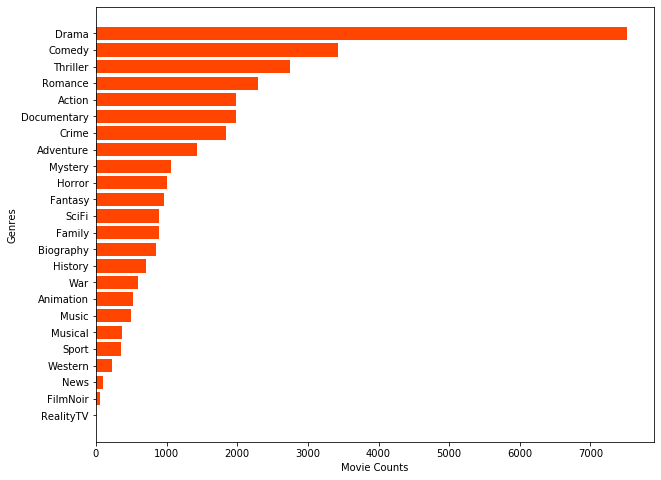

In [40]:
# print a plot that shows the counts of movies per genre
plt.figure(figsize=(10,8))
plt.barh(genre_counts.index, genre_counts.values, color='orangered')
plt.xlabel('Movie Counts')
plt.ylabel('Genres')
plt.show()


There is a huge data unbalance here!! Roughly half my movies are tagged as Drama... and in the other hand I have movie genres with less than 300 counts.. In my opinion, the model won't be able to learn about movie genres with such low number occurrences. I will probably have to drop those movie genres anyway. Usually, when confronted with data unbalance, there is a couple of ways to fix this for instance: downsampling or upsampling. However in this case, we are dealing with a multilabel classification.  A movie can have many labels at the same time. Which means that a "Western" can also be a "Drama" as well. It is very difficult to have movies with only the genres that are less represented so doing a downsampling or an upsampling won't fix the problem. Based on this, I decided to work with my dataset as it is for now, with the expectation that I will have some issues with my future model classifying the represented genres. 

In [26]:
# check out the less represented movie genres
Y.sum()[Y.sum()<300]

FilmNoir      59
News          99
RealityTV      3
Western      233
dtype: int64

In [27]:
# take a look at the combinations of movie genres when one of them is News
df[["News" in i for i in df['genre']]]

,tconst,genre,plot
5916,tt0388789,"[Documentary, Biography, News]",Filmed within the Red Light District of Calcut...
6431,tt0462318,"[Documentary, History, News]",The 9/11 News Special You Never Saw is a 70-mi...
8025,tt1232207,"[Documentary, Crime, News]",The film alternates between a fierce critique ...
8156,tt1300563,"[Documentary, History, News, War]",'The Age Of Stupid is the documentary-drama-an...
8172,tt1313104,"[Documentary, Biography, Crime, History, News]",In a sleepy lagoon off the coast of Japan lies...
...,...,...,...
12111,tt4289186,"[Documentary, Drama, News]",Can a school save a community? Oyler profiles ...
12127,tt4314120,"[Documentary, News]","In Race to Nowhere, director Vicki Abeles unve..."
12447,tt5164574,"[Documentary, Family, News]","With baby number 4 on the way, Bonnie and Chip..."
12630,tt5895028,"[Documentary, Crime, News]",The 13th Amendment to the U. S. Constitution a...


In [28]:
# take a look at the combinations of movie genres when one of them is RealityTV
df[["RealityTV" in i for i in df['genre']]]

,tconst,genre,plot
9750,tt1808010,"[Documentary, Biography, News, RealityTV]",Can 1 The Shelter Dog Episode:\nAt the WMIFF i...
11255,tt2853636,"[Documentary, Adventure, RealityTV]","At the age of 21, Sarah Begum, a British born ..."
11446,tt3114166,"[Action, Comedy, Fantasy, Mystery, RealityTV, ...",Declassified fills a void for anyone who feels...


In [29]:
# # take a look at the combinations of movie genres when one of them is FilmNoir
df[["FilmNoir" in i for i in df['genre']]]

,tconst,genre,plot
3,tt0042208,"[Crime, Drama, FilmNoir, Thriller]",A group of career criminals including Dix Hand...
5,tt0042275,"[Drama, FilmNoir]",The night before she is supposed to host a par...
7,tt0042296,"[Crime, Drama, FilmNoir]",Among the new arrivals at the Women's State Pr...
12,tt0042379,"[Crime, Drama, FilmNoir, Mystery, Romance]",An underground gambling joint managed by Danny...
16,tt0042530,"[Crime, Drama, FilmNoir, Romance, Thriller]",Gun Crazy starts with young Bart Tare (Russ Ta...
20,tt0042593,"[Drama, FilmNoir, Mystery, Romance, Thriller]","Dixon ""Dix"" Steele (Humphrey Bogart) is a tale..."
22,tt0042707,"[Crime, Drama, FilmNoir, Mystery]",In the San Francisco police department Lt. Ed ...
27,tt0042832,"[Crime, Drama, FilmNoir, Thriller]","At night, on a seedy street of New Orleans, we..."
28,tt0042869,"[Crime, Drama, FilmNoir, Mystery, Romance]","Dan Brady, an auto mechanic with Mackey Motor ..."
31,tt0042960,"[Crime, Drama, FilmNoir, Thriller]","Joe Norson, an expectant father and part-time ..."


In [30]:
# take a look at the combinations of movie genres when one of them is Western
df[["Western" in i for i in df['genre']]]

,tconst,genre,plot
6,tt0042286,"[Drama, Romance, Western]",Indian scout Tom Jeffords (James Stewart) is s...
8,tt0042313,"[Crime, Drama, Western]","Running from the Law, and with a badly injured..."
17,tt0042531,[Western],"In the opening scene, aging gunslinger Jimmy R..."
40,tt0043267,"[Comedy, Drama, Western]","Based on a radio soap opera, ""Ahi Viene Martin..."
46,tt0043371,"[Comedy, Western]",Although children throughout America are mesme...
...,...,...,...
12528,tt5478478,"[Drama, Western]","In 1892, a Comanche war party descends on the ..."
12634,tt5923026,"[Drama, Thriller, Western]","In the deserted hills of an Indonesian island,..."
12658,tt6098868,"[Documentary, Drama, History, Western]","Once exterminated from the lower 48 states, wo..."
12711,tt6412452,"[Comedy, Drama, Musical, Mystery, Romance, Wes...","We open on a large, leather bound novel on top..."


I would like to remove these movie genres 'FilmNoir','News','RealityTV','Western' from the list of possible labels that can be assigned to a movie. In other words, I am not going to drop the movies that are labeled as such but just remove that specific label from the combination of labels that it is assigned to it. So if a movie was labeled as [Documentary, Drama, History, Western], it will now become [Documentary, Drama, History]	

In [31]:
#loop over all the rows in df['genre']
for index in range(len(df['genre'])):
    # make a copy of the list of labels of a specific movie
    j=df['genre'][index].copy()
    # loop over the list labels 
    for word in j:
        # if the label in the list is in ['FilmNoir','News','RealityTV','Western'], we will remove that label
        if word in ['FilmNoir','News','RealityTV','Western']:
            df['genre'][index].remove(word)
  

In [32]:
# Check if it worked
df['genre']

0                                       [Comedy]
1                              [Comedy, Romance]
2                                        [Drama]
3                       [Crime, Drama, Thriller]
4                                   [Drama, War]
                          ...                   
13250                              [Documentary]
13251                            [Comedy, Drama]
13252                                   [Horror]
13253    [Animation, Action, Adventure, Fantasy]
13254                            [Comedy, Drama]
Name: genre, Length: 13255, dtype: object

In [33]:
# check if any movie is left without a genre
df[df['genre']=='[]']

,tconst,genre,plot


Now that we removed those labels from the our target, we need to do the same from the list of all_genres.

In [34]:
#update the list of all the gendres
for word in ['FilmNoir','News','RealityTV','Western']:
    all_genres.remove(word)
print(all_genres)
print(len(all_genres))

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Sport', 'Thriller', 'War']
20


We end up with a list of 20 possible labels.

One idea that I may persue later on to reduce data unbalance is to combine some labels together using the Market Basket Analysis


Now that I performed the cleaning and the EDA, let's put together the final dataframe that I will work with. Let's first update my target and  encode it again using MultiLabelBinarizer(). Next, let's concatenate it with the plots of the movies.

In [81]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb_genre_cleaned = MultiLabelBinarizer()
# fit
target=mlb_genre_cleaned.fit_transform(df['genre'])

In [79]:
# update the target and transform it into a dataframe
Y=pd.DataFrame(data=target, columns=mlb_genre_cleaned.classes_)
Y

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13250,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
13251,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
13252,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
13253,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [80]:
# concatenate the target with the movie plots
df_cleaned = pd.concat([Y, df['plot']], axis=1)
df_cleaned

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,plot
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(The IMDb storyline is incorrect.) On the even...
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"Synopsis Has been Written by Mr Rais Asghar, M..."
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,"At a prestigious awards ceremony, the celebrit..."
3,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,A group of career criminals including Dix Hand...
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,THE BIG LIFTThe Soviet Union withdraws from wh...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13250,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Bitcoin has been called one of the most disrup...
13251,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Miss Taylor's wedding to Mr Weston is a sad da...
13252,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,"Cult Cinema presents ""Faces of the Dead"" this ..."
13253,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"In Japan, Shirai Ryu Grandmaster Hanzo Hasashi..."


Ouf!! All done.. Let's export the cleaned data into a csv file 'df_cleaned.csv'. I will need to start preprocessing my data for modeling purposes.

In [83]:
df_cleaned.to_csv(f'/Users/SanaKrichen/Desktop/Brainstation/Capstone Project/df_cleaned.csv', index = False, header=True)


In [88]:
Coming Next: Preprocessing

Idea for possible improvement:

One idea that I may pursue later on to reduce data unbalance is to combine some labels together using the Market Basket Analysis.